In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [3]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [77]:
data = np.loadtxt("shearing-water.dat", skiprows = 4)
vx = data[:,4]*1e5 # m/s
z = data[:,1]/10 # nm
rho = data[:,3]

data = np.loadtxt("shearing-ions.dat", skiprows = 4)
vxi = data[:,4]*1e5 # m/s
zi = data[:,1]/10 # nm
rhoi = data[:,3]

data = np.loadtxt("shearing-wall.dat", skiprows = 4)
vxw = data[:,4]*1e5 # m/s
zw = data[:,1]/10 # nm
rhow = data[:,3]

rhof = rho+rhoi
vxf = (vx+vxi)/2

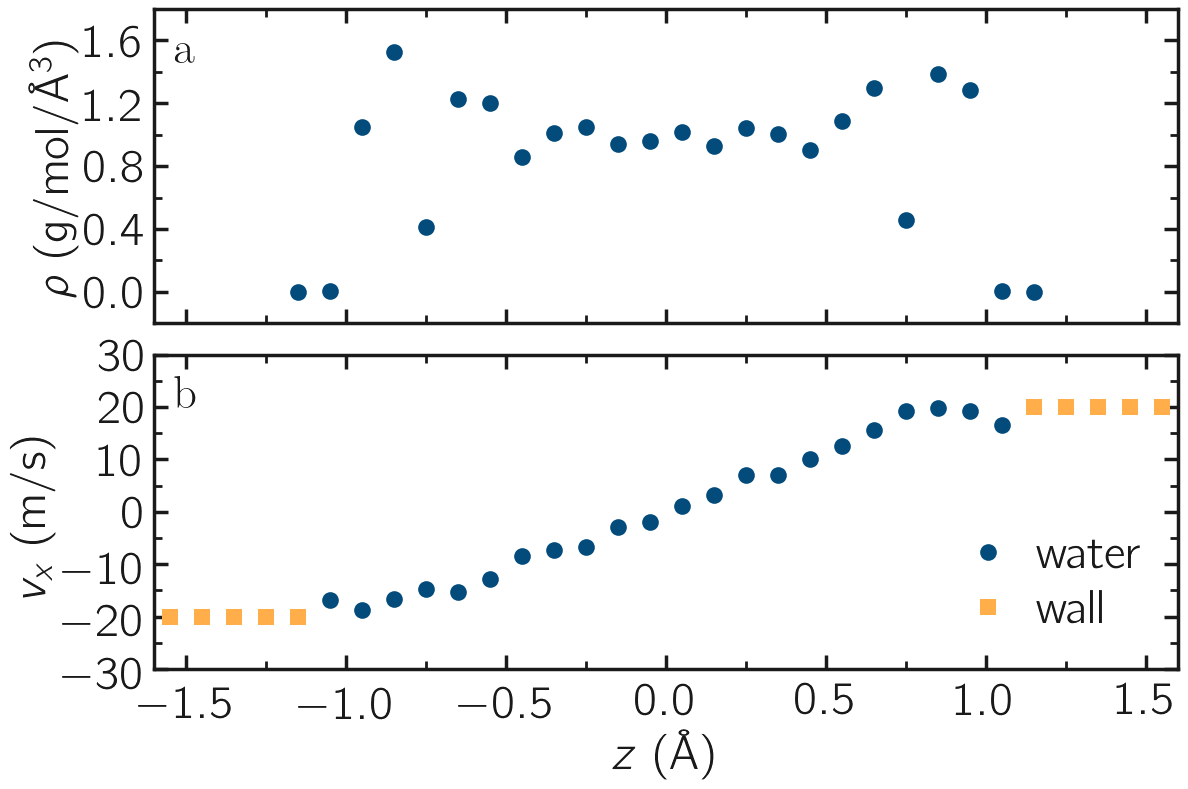

In [85]:
filename = "NANOSHEAR-profiles"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)

# Panel a
myplt.add_panel()
myplt.add_plot(x = z[rho>0], y = rho[rho>0], type = "plot", linewidth_data = 3,
               marker = "o", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$\rho ~ \mathrm{(g/mol/\AA{}^3)}$',
                     xlabel = None, xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-1.5, 1.6, 0.5), y_ticks=np.arange(0, 1.81, 0.4),
                    x_boundaries=(-1.6, 1.6), y_boundaries=(-0.2, 1.8))

# Panel b
myplt.add_panel()
myplt.add_plot(x = z[rho>0], y = vx[rho>0], type = "plot", linewidth_data = 3,
               marker = "o", data_color = color2, markersize = 12, data_label=r"$\mathrm{water}$")
myplt.add_plot(x = zw[rhow>0], y = vxw[rhow>0], type = "plot", linewidth_data = 3,
               marker = "s", data_color = color1, markersize = 12, data_label=r"$\mathrm{wall}$")
myplt.complete_panel(ylabel = r'$v_x ~ \mathrm{(m/s)}$',
                     xlabel = r'$z~\mathrm{(\AA{})}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-1.5, 1.6, 0.5), y_ticks=np.arange(-30, 35, 10),
                    x_boundaries=(-1.6, 1.6), y_boundaries=(-25, 25))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)

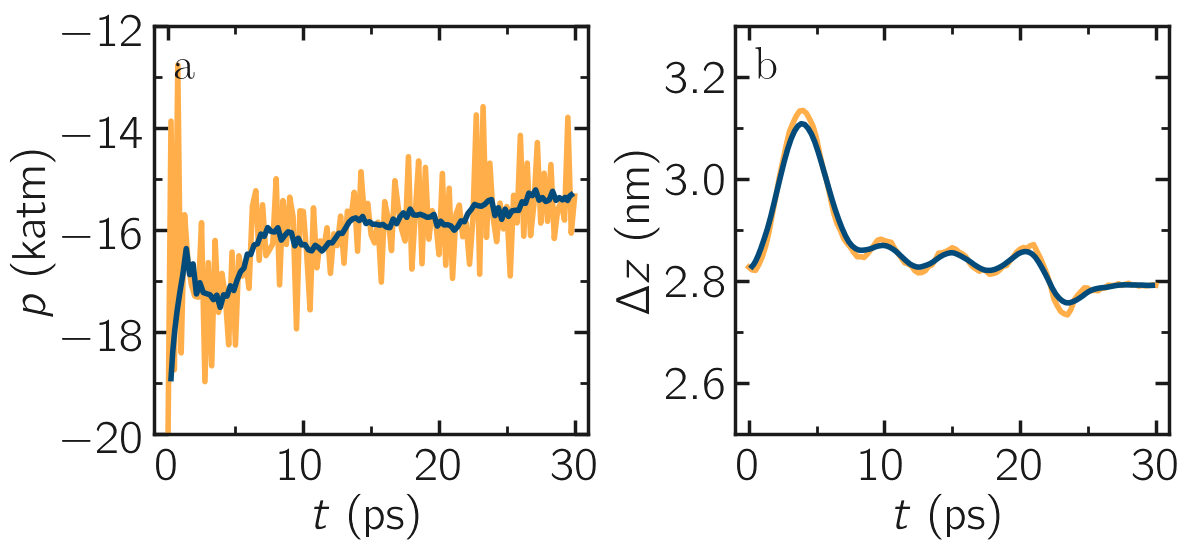